In [8]:
import pandas as pd
import numpy as np
from datetime import *
from scipy import interpolate
from matplotlib import pylab

In [9]:
# pd.options.display.float_format='{:,>.2f}'.format

In [23]:
dates = [date(2030,3,25), date(2030,4,25), date(2030,6,25), date(2030,9,25)]
strikes = [2.2, 2.3, 2.4, 2.5, 2.6]

In [24]:
# 编一个隐含波动率矩阵
vol_mat = np.array([[ 0.32562851,  0.29746885,  0.29260648,  0.27679993],
                  [ 0.28841840,  0.29196629,  0.27385023,  0.26511898],
                  [ 0.27659511,  0.27350773,  0.25887604,  0.25283775],
                  [ 0.26969754,  0.25565971,  0.25803327,  0.25407669],
                  [ 0.27773032,  0.24823248,  0.27340796,  0.24814975]])

In [25]:
vol_table = pd.DataFrame(vol_mat, index = strikes, columns = dates)
vol_table.index.name = 'Strike Price'
vol_table.columns.name = 'Maturity Date'

In [26]:
# 设定起始时间
now = date(2030,2,23)

datetime.timedelta(days=-31)

In [27]:
t2m = np.array([(d - now).days / 365.0 for d in dates])
var_mat = (vol_mat**2) * t2m

In [28]:
# 利用scipy中的interpolate进行线性插值
inter = interpolate.interp2d(t2m, strikes, var_mat, kind = 'linear')

In [29]:
# 创建插值点
s_direction = np.linspace(strike_price[0], strike_price[-1], 500)
t_direction = np.linspace(t2m[0], t2m[-1], 400)

In [30]:
# 构建曲面数据
inter_var_surf = np.zeros((len(s_direction),len(t_direction)))
for i, s in enumerate (s_direction):
    for j, t in enumerate (t_direction):
        inter_var_surf[i][j] = inter(t, s)
inter_vol_surf = np.sqrt((inter_var_surf / t_direction))

Text(0.5, 1.0, 'Options volatility at 2030/3/25(maturity date)')

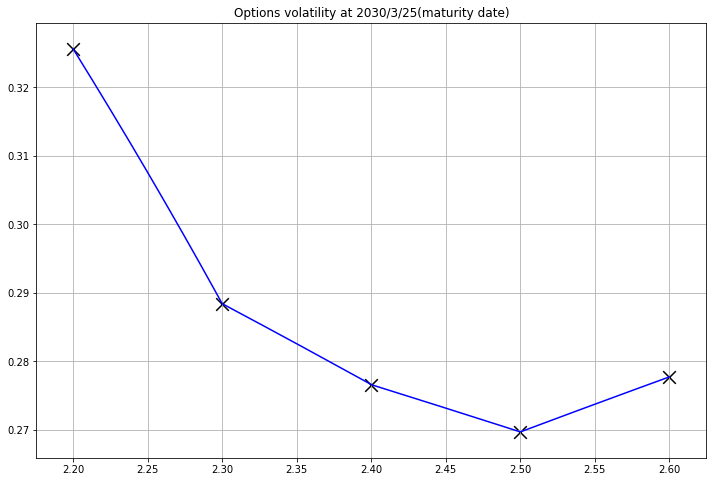

In [32]:
# 波动率微笑
pylab.figure(figsize = (12,8))
pylab.plot(s_direction, inter_vol_surf[:,0], color = 'b')
pylab.scatter(x = strikes, y = vol_mat[:,0], color = 'k', marker = 'x', s = 160)
pylab.grid(True)
pylab.title("Options volatility at 2030/3/25(maturity date)" )

Text(0.5, 0, 'Volatility')

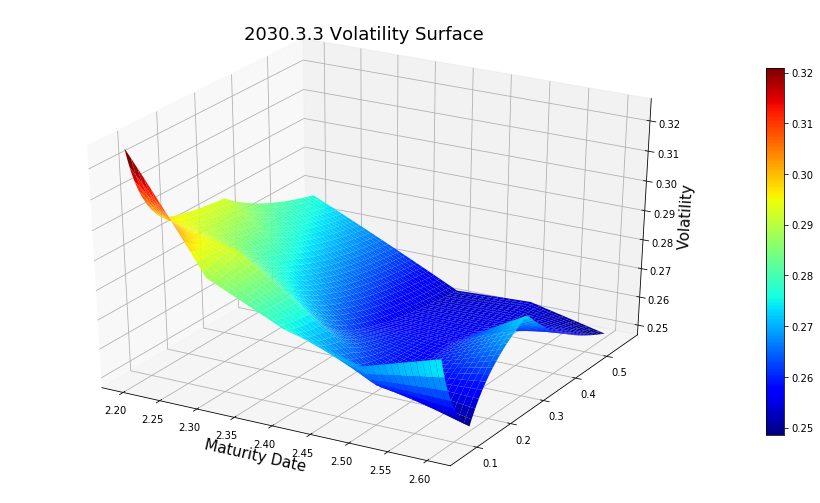

In [22]:
# 波动率曲面
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

pylab.figure(figsize = (16,9))
ax = pylab.gca(projection = '3d')

T, K = np.meshgrid(t_direction, s_direction)
surface = ax.plot_surface(K, T, inter_vol_surf, cmap = cm.jet)
pylab.colorbar(surface, shrink = 0.75)
pylab.title('2030.3.3 Volatility Surface', fontsize = 18)
pylab.xlabel('Strike Price', fontsize = 15)
pylab.xlabel('Maturity Date', fontsize = 15)
ax.set_zlabel('Volatility', fontsize = 15)